In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from dtypes import users_beers_dtype, beers_dtype
import matplotlib.pyplot as plt
"""
long:
sns.barplot(df);
df['count'].pie()
"""

"\nlong:\nsns.barplot(df);\ndf['count'].pie()\n"

In [4]:
df = pd.read_csv('../data/users_beers.csv', dtype=users_beers_dtype)
print(df.shape)

(16578208, 6)


In [5]:
df.head()

,id,user_name,score,count,first_checkin_date,recent_checkin_date
0,20825,Lotry,3.00,1,"Fri, 24 Feb 2023 18:53:21 +0600","Fri, 24 Feb 2023 18:53:21 +0600"
1,4699736,Lotry,3.00,1,"Wed, 22 Feb 2023 23:27:54 +0600","Wed, 22 Feb 2023 23:27:54 +0600"
2,3390335,Lotry,2.75,1,"Tue, 17 Jan 2023 16:23:58 +0600","Tue, 17 Jan 2023 16:23:58 +0600"
3,4690712,Lotry,2.25,1,"Wed, 11 Jan 2023 08:27:43 +0600","Wed, 11 Jan 2023 08:27:43 +0600"
4,1046259,Lotry,2.50,1,"Tue, 10 Jan 2023 19:42:50 +0600","Tue, 10 Jan 2023 19:42:50 +0600"


In [9]:
beers_df = pd.read_csv('../data/beers.csv')
print(beers_df.shape)

(2533906, 9)


In [6]:
# users_df = pd.read_csv('./users_located.csv')
users_df = pd.read_csv('../data/users.csv')
print(users_df.shape)

(11664, 13)


In [ ]:
# intervals = [[0, 100], [100, 500], [500, 1000], [1000, 5000], [5000, 100000]]
# index = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
df['style'] = df.id.map(beers_df.set_index('id')['style'])

## Зависимость популярности стилей от количества чекинов пользователей

In [145]:
N_TOP_STYLES = 10

In [166]:
N_MANY_STYLES = 100
intervals = [[0,300], [300, 1000], [1000, 2500], [2500, 5000], [5000, 100000]]

def favorite_styles_of_user_group(interval, n_top_styles=N_MANY_STYLES):
	min_checkins = interval[0]
	max_checkins = interval[1]
	slice_of_user_group = df[df.user_name.isin(users_df[(users_df.total_beers >= min_checkins)
						     & (users_df.total_beers < max_checkins)].user_name)]
	counts = slice_of_user_group['style'].value_counts()[:n_top_styles]
	total_checkins = slice_of_user_group.shape[0]
	for index in counts.index:
			counts[index] = (counts[index] / total_checkins * 100).round(2)
	return counts

In [168]:
# create top_unique_styles_index – index for common order among intervals
one = favorite_styles_of_user_group(intervals[0])
two = favorite_styles_of_user_group(intervals[1])
three = favorite_styles_of_user_group(intervals[2])
four = favorite_styles_of_user_group(intervals[3])
five = favorite_styles_of_user_group(intervals[4])

top_unique_styles_index = pd.concat([one, two, three, four, five]).index.drop_duplicates()

one = one.reindex(top_unique_styles_index)
two = two.reindex(top_unique_styles_index)
three = three.reindex(top_unique_styles_index)
four = four.reindex(top_unique_styles_index)
five = five.reindex(top_unique_styles_index)

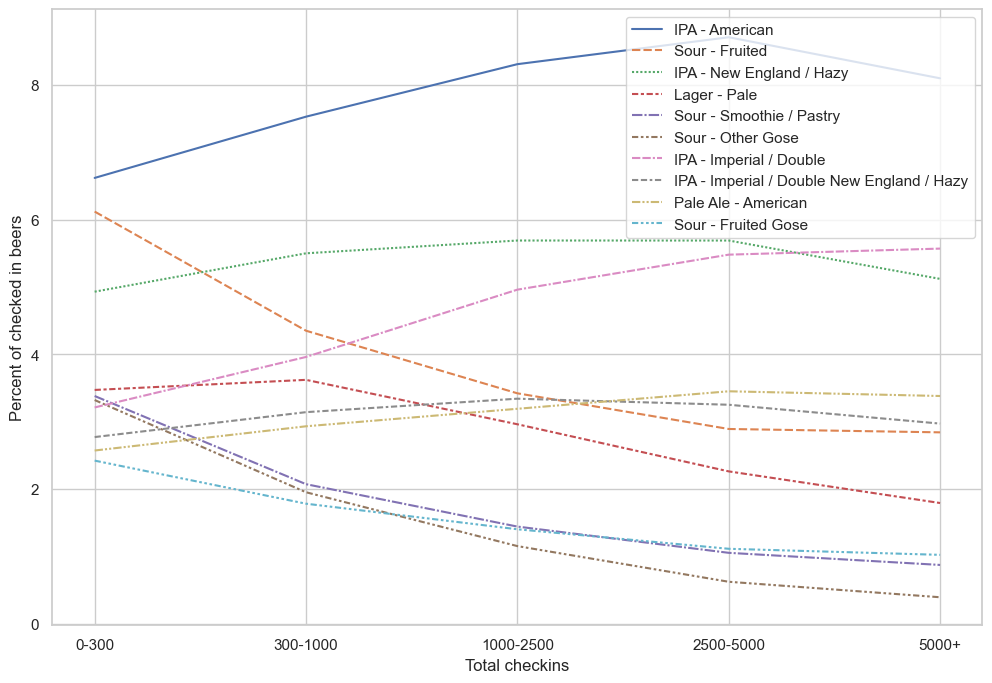

In [173]:
N_TOP_STYLES = 10
def create_data(frames):
    return [frame.values[:N_TOP_STYLES] for frame in frames]
data = create_data([one, two, three, four, five])
index = ['0-300', '300-1000', '1000-2500', '2500-5000', '5000+']
columns = top_unique_styles_index[:N_TOP_STYLES]
lineplot_data = pd.DataFrame(data, index, columns)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=lineplot_data);
plt.xlabel('Total checkins')
plt.ylabel('Percent of checked in beers')
plt.legend(loc='upper right')

plt.show()

## -----